In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import obspy
import requests
from collections import Counter
sys.path.insert(0, os.path.abspath("../"))

In [2]:
st2 = obspy.read("test_data/mseed/CI.YUH2.2020-10-01T00_00.mseed")
st2

3 Trace(s) in Stream:
CI.YUH2..HHE | 2020-10-01T00:00:00.008300Z - 2020-10-01T00:02:59.998300Z | 100.0 Hz, 18000 samples
CI.YUH2..HHN | 2020-10-01T00:00:00.008300Z - 2020-10-01T00:02:59.998300Z | 100.0 Hz, 18000 samples
CI.YUH2..HHZ | 2020-10-01T00:00:00.008300Z - 2020-10-01T00:02:59.998300Z | 100.0 Hz, 18000 samples

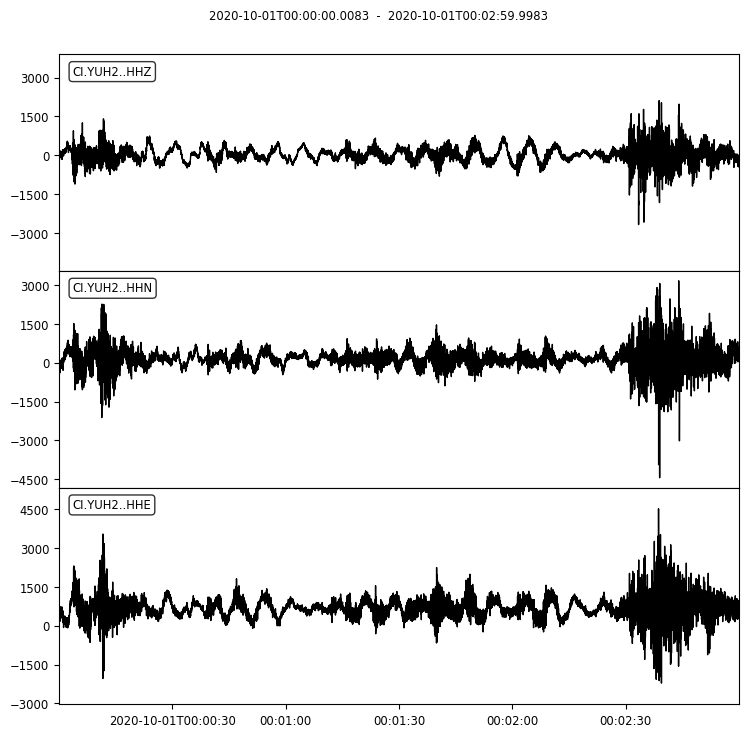

In [3]:
st2.plot();

# PhaseNet Lokal

In [4]:
df = pd.read_csv("results/picks_sebelum_denoisednpz.csv")
df["phase_time"] = pd.to_datetime(df["phase_time"])  # Convert "phase_time" to datetime
df.head()

,station_id,begin_time,phase_index,phase_time,phase_score,phase_type,file_name,phase_amplitude,phase_amp
0,CI.BOM..HH,2020-10-01T00:00:00.008,14728,2020-10-01 00:02:27.288,0.767,P,CI.BOM.2020-10-01T00_00.mseed,0.000016,0.000016
1,CI.BOM..HH,2020-10-01T00:00:00.008,15488,2020-10-01 00:02:34.888,0.603,S,CI.BOM.2020-10-01T00_00.mseed,0.000016,0.000016
2,CI.COA..HH,2020-10-01T00:00:00.008,317,2020-10-01 00:00:03.178,0.787,P,CI.COA.2020-10-01T00_00.mseed,0.000023,0.000023
3,CI.COA..HH,2020-10-01T00:00:00.008,3863,2020-10-01 00:00:38.638,0.778,P,CI.COA.2020-10-01T00_00.mseed,0.000016,0.000016
4,CI.COA..HH,2020-10-01T00:00:00.008,7543,2020-10-01 00:01:15.438,0.908,P,CI.COA.2020-10-01T00_00.mseed,0.000015,0.000015


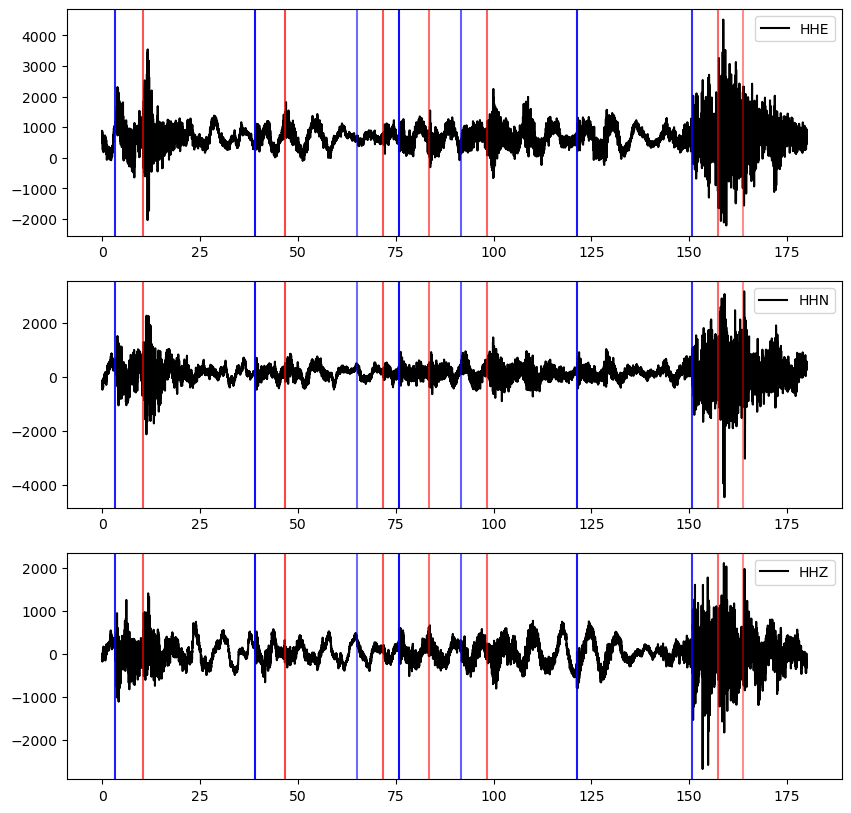

In [5]:
df_filter = df[df["station_id"].str.startswith("CI.YUH2")]

fig, ax = plt.subplots(len(st2), 1, figsize=(10, 10))
for i, tr in enumerate(st2):
    ax[i].plot(tr.times(), tr.data, label=tr.stats.channel, c="k")
    for _, pick in df_filter.iterrows():
        c = "blue" if pick["phase_type"] == "P" else "red"
        label = pick["phase_type"] if i == 0 else None
        ax[i].axvline((pick["phase_time"] - tr.stats.starttime.datetime).total_seconds(), c=c, alpha=pick["phase_score"])
    ax[i].legend()

plt.show()

# # Filter DataFrame for station_id C.BOM
# df_filter = df[df["station_id"].str.startswith("CI.YUH2")]

# fig, ax = plt.subplots(len(st2), 1, figsize=(10, 10))
# for i, tr in enumerate(st2):
#     ax[i].plot(tr.times(), tr.data, label=tr.stats.channel, c="k")
    
#     for _, pick in df_filter.iterrows():
#         if pick["phase_type"] == "P":
#             ax[i].axvline((pick["phase_time"] - tr.stats.starttime.datetime).total_seconds(), c='blue', label="P", alpha=pick["phase_score"])
#             ax[i].axvline((pick["phase_time"] - tr.stats.starttime.datetime).total_seconds(), c='red', label="S", alpha=pick["phase_score"])
#     ax[i].legend()

# plt.show()

In [6]:
df_filter

,station_id,begin_time,phase_index,phase_time,phase_score,phase_type,file_name,phase_amplitude,phase_amp
158,CI.YUH2..HH,2020-10-01T00:00:00.008,343,2020-10-01 00:00:03.438,0.874,P,CI.YUH2.2020-10-01T00_00.mseed,4.545987e-06,4.545987e-06
159,CI.YUH2..HH,2020-10-01T00:00:00.008,3907,2020-10-01 00:00:39.078,0.950,P,CI.YUH2.2020-10-01T00_00.mseed,1.812069e-06,1.812069e-06
160,CI.YUH2..HH,2020-10-01T00:00:00.008,6509,2020-10-01 00:01:05.098,0.576,P,CI.YUH2.2020-10-01T00_00.mseed,8.726333e-07,8.726333e-07
161,CI.YUH2..HH,2020-10-01T00:00:00.008,7586,2020-10-01 00:01:15.868,0.946,P,CI.YUH2.2020-10-01T00_00.mseed,1.566433e-06,1.566433e-06
162,CI.YUH2..HH,2020-10-01T00:00:00.008,9181,2020-10-01 00:01:31.818,0.621,P,CI.YUH2.2020-10-01T00_00.mseed,2.494754e-06,2.494754e-06
163,CI.YUH2..HH,2020-10-01T00:00:00.008,12121,2020-10-01 00:02:01.218,0.904,P,CI.YUH2.2020-10-01T00_00.mseed,1.452123e-06,1.452123e-06
164,CI.YUH2..HH,2020-10-01T00:00:00.008,15076,2020-10-01 00:02:30.768,0.815,P,CI.YUH2.2020-10-01T00_00.mseed,7.295446e-06,7.295446e-06
165,CI.YUH2..HH,2020-10-01T00:00:00.008,1038,2020-10-01 00:00:10.388,0.674,S,CI.YUH2.2020-10-01T00_00.mseed,4.545987e-06,4.545987e-06
166,CI.YUH2..HH,2020-10-01T00:00:00.008,4670,2020-10-01 00:00:46.708,0.743,S,CI.YUH2.2020-10-01T00_00.mseed,1.812069e-06,1.812069e-06
167,CI.YUH2..HH,2020-10-01T00:00:00.008,7166,2020-10-01 00:01:11.668,0.678,S,CI.YUH2.2020-10-01T00_00.mseed,1.231777e-06,1.231777e-06


# PhaseNet Seisbench

In [7]:
import seisbench.models as sbm
PN_model = sbm.PhaseNet.from_pretrained("original")

In [8]:
pred1 = PN_model.annotate(st2)
output = PN_model.classify(st2)

In [9]:
print(output.picks[0].__dict__)

{'trace_id': 'CI.YUH2.', 'start_time': UTCDateTime(2020, 10, 1, 0, 0, 3, 290000), 'end_time': UTCDateTime(2020, 10, 1, 0, 0, 3, 640000), 'peak_time': UTCDateTime(2020, 10, 1, 0, 0, 3, 470000), 'peak_value': 0.89678645, 'phase': 'P'}


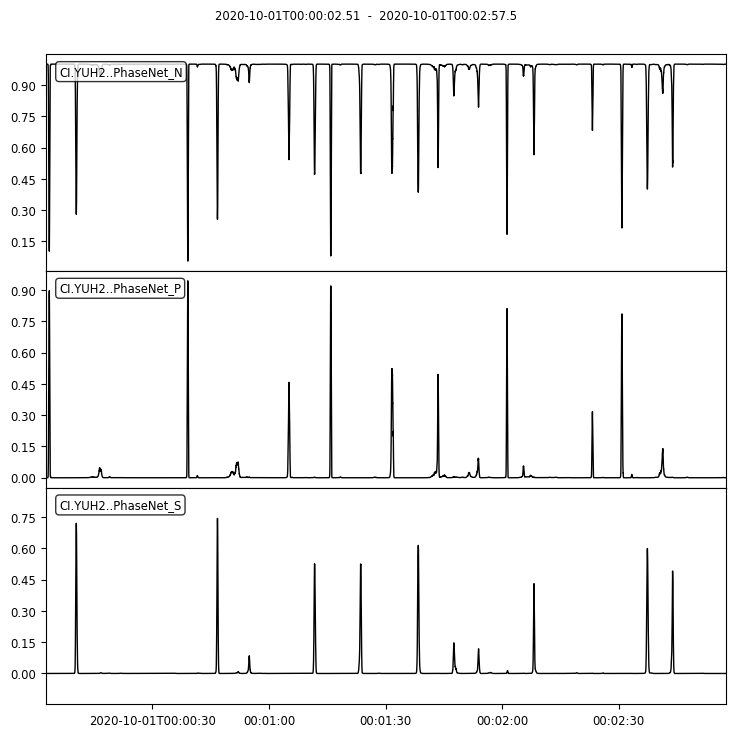

In [10]:
pred1.plot();

In [11]:
output.picks[0].__dict__

{'trace_id': 'CI.YUH2.',
 'start_time': 2020-10-01T00:00:03.290000Z,
 'end_time': 2020-10-01T00:00:03.640000Z,
 'peak_time': 2020-10-01T00:00:03.470000Z,
 'peak_value': 0.89678645,
 'phase': 'P'}

In [12]:
Counter([p.phase for p in output.picks])

Counter({'P': 9, 'S': 8})

In [13]:
seis_df = []
for p in output.picks:
    seis_df.append({
        "id": p.trace_id,
        "timestamp": p.peak_time.datetime,
        "prob": p.peak_value,
        "type": p.phase.lower()
    })
seis_df = pd.DataFrame(seis_df)
seis_df

,id,timestamp,prob,type
0,CI.YUH2.,2020-10-01 00:00:03.470,0.896786,p
1,CI.YUH2.,2020-10-01 00:00:10.410,0.719856,s
2,CI.YUH2.,2020-10-01 00:00:39.100,0.944359,p
3,CI.YUH2.,2020-10-01 00:00:46.740,0.743417,s
4,CI.YUH2.,2020-10-01 00:01:05.140,0.457655,p
5,CI.YUH2.,2020-10-01 00:01:11.720,0.526369,s
6,CI.YUH2.,2020-10-01 00:01:15.900,0.919724,p
7,CI.YUH2.,2020-10-01 00:01:23.620,0.524021,s
8,CI.YUH2.,2020-10-01 00:01:31.640,0.523727,p
9,CI.YUH2.,2020-10-01 00:01:38.410,0.614053,s


In [14]:
waveforms = st2.copy().detrend()

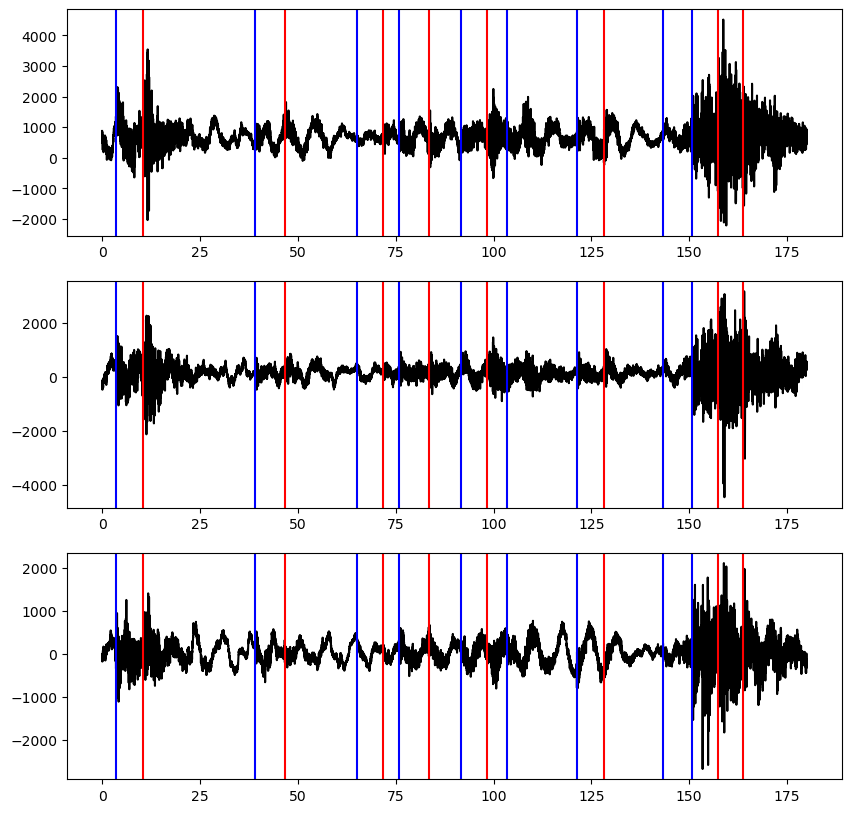

In [15]:
fig, ax = plt.subplots(len(st2), 1, figsize=(10, 10))
for i, tr in enumerate(st2):
    ax[i].plot(tr.times(), tr.data, label=tr.stats.channel, c="k")
    for _, pick in seis_df.iterrows():
        c = "blue" if pick["type"] == "p" else "red"
        label = pick["type"] if i == 0 else None
        ax[i].axvline((pick["timestamp"] - tr.stats.starttime.datetime).total_seconds(), c=c, label=label)
    #ax[i].legend()

plt.show()

In [16]:
st = pd.read_hdf("test_data\data.h5")